K-Means Clustering

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import joblib
import os 

In [66]:
# Load dataset
df = pd.read_csv('/Users/sa26/Documents/GitHub/Music-Recommendation-Algorithm/data/processed/processed_train.csv')
df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16
0,0.814401,0.233626,0.132828,-0.015186,-0.311880,0.333710,0.216256,-0.165217,-0.279675,0.001896,0.220046,-0.250754,0.023256,-0.098973,-0.027108,-0.014240
1,0.788769,0.214497,0.126871,0.001028,-0.360252,0.424255,0.208152,0.141608,0.328986,0.056779,-0.144269,-0.108526,-0.155290,-0.085865,0.077608,-0.107197
2,0.786633,0.233628,0.162003,-0.008777,-0.408683,0.422581,0.207997,-0.058942,-0.019996,0.252224,0.267590,0.198441,0.027936,-0.106465,-0.125444,-0.104068
3,0.792041,0.239691,0.151408,-0.005893,-0.376406,0.378263,0.252594,-0.091477,-0.117862,0.072759,-0.146978,0.012128,0.144868,0.039337,0.053666,0.134730
4,0.790116,0.234139,0.139443,0.004712,-0.392245,0.447621,0.197345,-0.009376,0.306702,0.040068,-0.076781,-0.106108,-0.018365,0.093827,-0.024956,0.131445


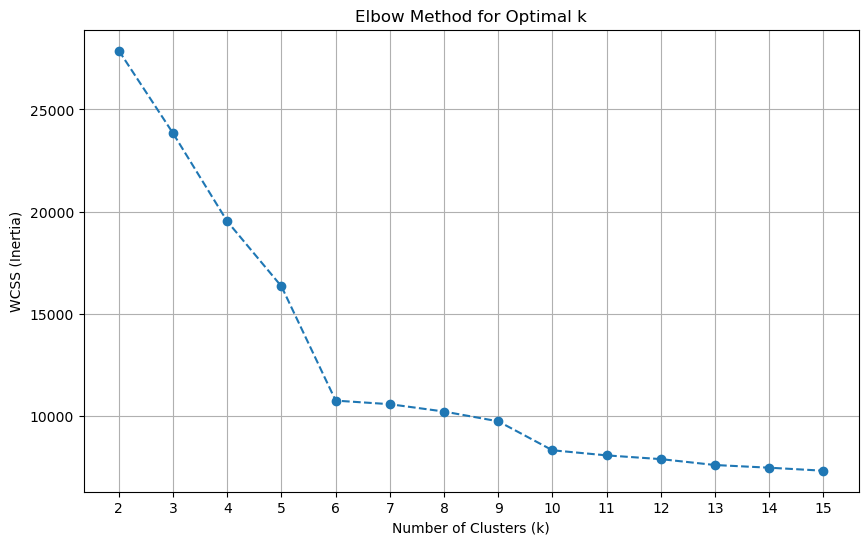

In [67]:
# Determine the Optimal Number of Clusters (k)

# Method A: Elbow Method (using Inertia/WCSS)
wcss = [] # Within-Cluster Sum of Squares
k_range = range(2, 16) # Test k values from 2 up to 15

for k in k_range:
    kmeans_test = KMeans(n_clusters=k,
                         init='k-means++',
                         n_init='auto',    # Automatically run multiple initializations
                         random_state=42)  # For reproducibility
    kmeans_test.fit(df)
    wcss.append(kmeans_test.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()




Calculated Silhouette Score for k=2: 0.1857
Calculated Silhouette Score for k=3: 0.2564
Calculated Silhouette Score for k=4: 0.3321
Calculated Silhouette Score for k=5: 0.3866
Calculated Silhouette Score for k=6: 0.4891
Calculated Silhouette Score for k=7: 0.4034
Calculated Silhouette Score for k=8: 0.3863
Calculated Silhouette Score for k=9: 0.3078
Calculated Silhouette Score for k=10: 0.3348


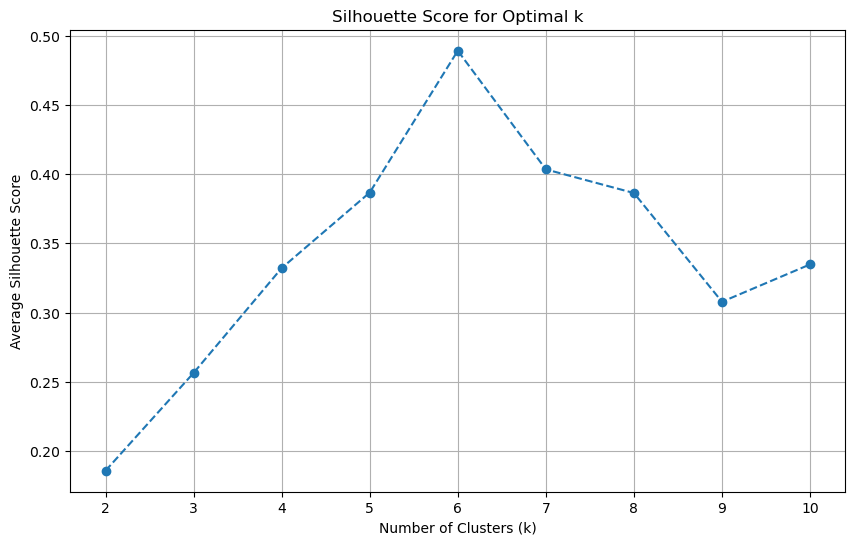

In [68]:
# Method B: Silhouette Score
silhouette_scores = []
k_range_silhouette = range(2, 11) # Test fewer k values due to computation time

for k in k_range_silhouette:
    kmeans_test = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    cluster_labels = kmeans_test.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Calculated Silhouette Score for k={k}: {silhouette_avg:.4f}")

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()


In [69]:
# Choose k and Run K-Means Clustering

chosen_k = 6

kmeans = KMeans(n_clusters=chosen_k,
                init='k-means++',
                n_init='auto',
                max_iter=300,
                random_state=42)
# Fit the model and predict cluster labels
clusters = kmeans.fit_predict(df)
print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")
kmeans.cluster_centers_

Cluster centers shape: (6, 16)


array([[-2.63878759e-01, -5.37363075e-01,  6.88076287e-01,
        -1.02841055e-01, -8.28957479e-02, -3.76710030e-02,
        -2.28141001e-03,  1.11832783e-02, -3.89109045e-03,
        -3.06633962e-02,  5.60812029e-03,  1.52042758e-03,
        -2.99214080e-03,  4.24666955e-03,  6.52161401e-04,
        -2.00729684e-03],
       [-1.79751673e-01, -2.20280527e-01, -3.32839899e-01,
         8.11949633e-01, -2.19665581e-01, -5.07281159e-02,
        -1.72864831e-02,  2.18350548e-02, -1.34410248e-02,
        -2.73640289e-02,  1.06442192e-02,  6.02839635e-03,
         2.71263439e-03,  7.47786393e-03,  1.00035429e-03,
        -1.03425418e-03],
       [ 8.04546025e-01,  1.51044148e-01,  6.66367978e-02,
        -2.84086106e-02, -4.73531520e-02, -1.36780997e-02,
        -1.04048000e-02,  1.28936501e-02, -1.16494455e-03,
        -1.03282359e-02,  8.83212585e-04,  5.81393544e-03,
        -2.86118439e-04,  3.99928812e-03,  3.29605927e-04,
        -1.55884115e-03],
       [-2.00061620e-01, -3.04006327e

In [70]:
#  Add Cluster Labels to DataFrame

df['cluster'] = clusters

# Analyze cluster sizes
print(df['cluster'].value_counts().sort_index())

cluster
0    4603
1    3844
2    7038
3    4032
4    3401
5    5444
Name: count, dtype: int64


In [71]:
df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,cluster
0,0.814401,0.233626,0.132828,-0.015186,-0.311880,0.333710,0.216256,-0.165217,-0.279675,0.001896,0.220046,-0.250754,0.023256,-0.098973,-0.027108,-0.014240,2
1,0.788769,0.214497,0.126871,0.001028,-0.360252,0.424255,0.208152,0.141608,0.328986,0.056779,-0.144269,-0.108526,-0.155290,-0.085865,0.077608,-0.107197,2
2,0.786633,0.233628,0.162003,-0.008777,-0.408683,0.422581,0.207997,-0.058942,-0.019996,0.252224,0.267590,0.198441,0.027936,-0.106465,-0.125444,-0.104068,2
3,0.792041,0.239691,0.151408,-0.005893,-0.376406,0.378263,0.252594,-0.091477,-0.117862,0.072759,-0.146978,0.012128,0.144868,0.039337,0.053666,0.134730,2
4,0.790116,0.234139,0.139443,0.004712,-0.392245,0.447621,0.197345,-0.009376,0.306702,0.040068,-0.076781,-0.106108,-0.018365,0.093827,-0.024956,0.131445,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,-0.083234,-0.123701,-0.107574,0.021975,0.492684,-0.609807,0.210735,-0.431413,0.200592,0.595167,-0.338408,-0.051508,0.568086,-0.231174,0.197772,-0.004432,4
28358,-0.076783,-0.127896,-0.105756,0.020644,0.437323,-0.533258,0.075322,-0.485070,0.245634,0.714632,0.037290,-0.084959,0.210769,-0.248058,0.046535,0.018568,4
28359,-0.075246,-0.152119,-0.127599,0.020587,0.469841,-0.552808,0.094538,-0.337964,0.332064,0.685859,-0.226930,-0.217398,0.093780,-0.109121,-0.039561,0.051573,4
28360,-0.073692,-0.147374,-0.118733,0.039369,0.466124,-0.570297,0.163230,-0.478306,0.256420,0.718858,-0.269246,0.000862,-0.162198,-0.185499,0.103890,-0.055256,4


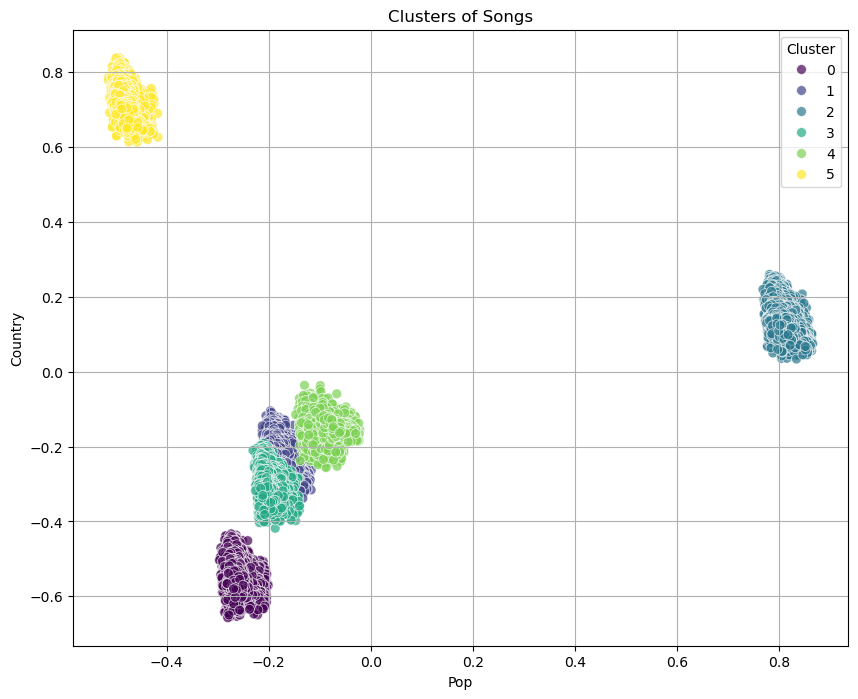

In [87]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['PC_1'], y=df['PC_2'], hue=df['cluster'], palette='viridis', s=50, alpha=0.7)
plt.title(f'Clusters of Songs')
plt.xlabel('Pop')
plt.ylabel('Country')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Mean coordinates for each cluster:
             PC_1      PC_2      PC_3
cluster                              
0       -0.263879 -0.537363  0.688076
1       -0.179752 -0.220281 -0.332840
2        0.804546  0.151044  0.066637
3       -0.200062 -0.304006 -0.618430
4       -0.092194 -0.157800 -0.146864
5       -0.484312  0.738358  0.116867


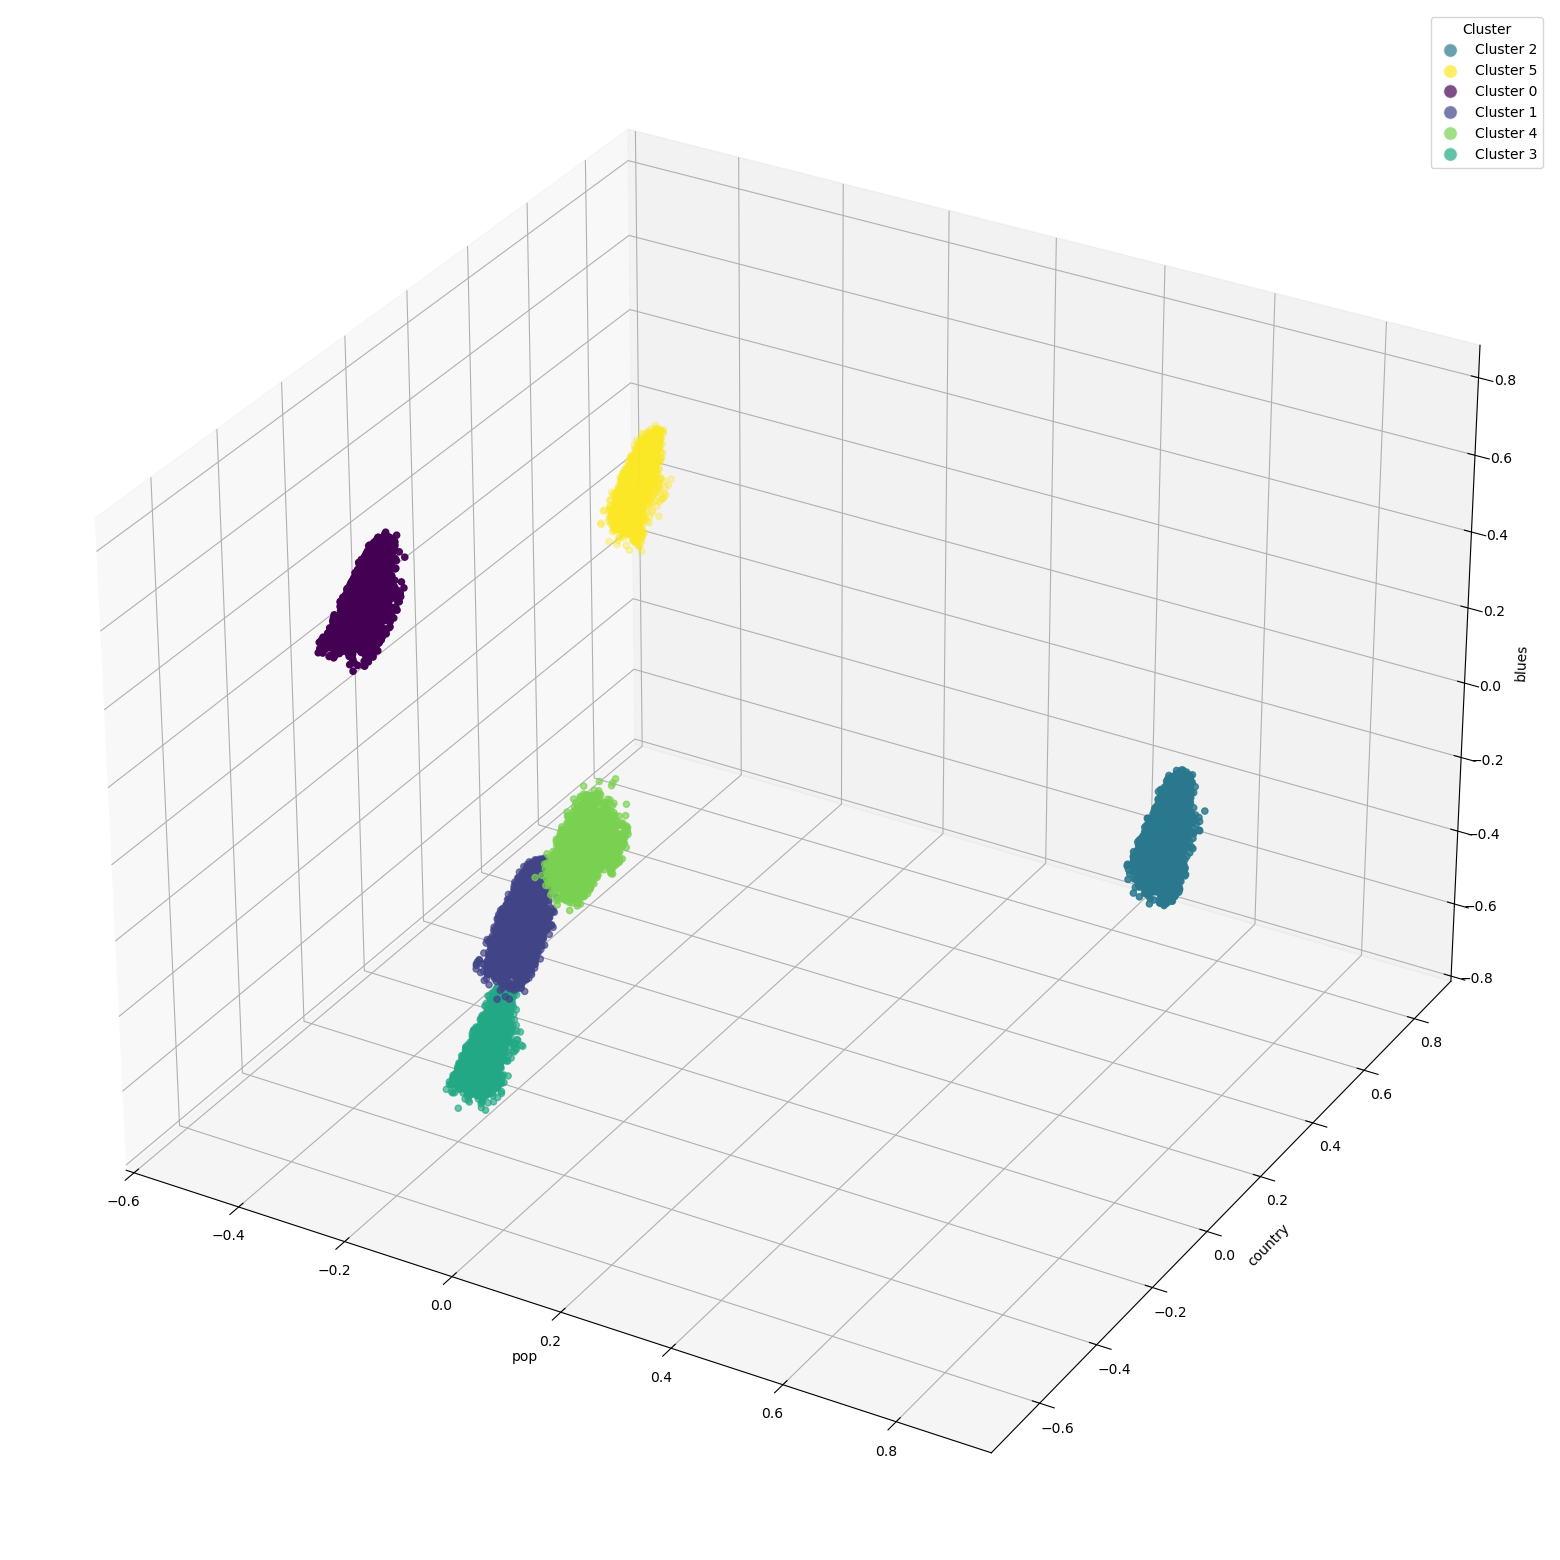

In [102]:
if all(col in df.columns for col in ['PC_1', 'PC_2', 'PC_3', 'cluster']):
    cluster_means = df.groupby('cluster')[['PC_1', 'PC_2', 'PC_3']].mean()

    # --- Step 2: Print the mean coordinates ---
    print("Mean coordinates for each cluster:")
    print(cluster_means)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the scatter plot
sc = ax.scatter(df["PC_1"], df["PC_2"], df["PC_3"], c=df['cluster'], cmap='viridis')

# Set axis labels
ax.set_xlabel('pop')
ax.set_ylabel('country')
ax.set_zlabel('blues')

# Create proxy artists for the legend
proxies = []
for cluster in df['cluster'].unique():
    proxy = Line2D([0], [0], marker='o', color='w', 
                   label=f'Cluster {cluster}',
                   markerfacecolor=sc.cmap(sc.norm(cluster)),
                   markersize=10,
                   alpha=0.7)
    proxies.append(proxy)

# Add legend
ax.legend(handles=proxies, title='Cluster')

# Adjust figure size
plt.gcf().set_size_inches(20, 20)
plt.show()

New Sample Prediction

In [74]:
# Load the test dataset
test_df = pd.read_csv('/Users/sa26/Documents/GitHub/Music-Recommendation-Algorithm/data/raw/recommend.csv')
test_df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429
5,54425,noro morales,silencio,1952,jazz,fear dark fear thunder fear silence spirit dea...,57,0.001462,0.487965,0.140561,...,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.001462,0.034645,violence,0.971429
6,77225,rage against the machine,pistol grip pump,2000,rock,pistolgrip pump time pistolgrip pump time pist...,152,0.000675,0.000675,0.134044,...,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.000675,obscene,0.285714
7,42962,taste,railway and gun,1970,blues,railway leave time choose tell tell lose throw...,37,0.051874,0.001645,0.001645,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,sadness,0.714286
8,28825,randy travis,messin' with my mind,1986,country,say thing care hang long ahead leave start mes...,41,0.001504,0.001504,0.132148,...,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,night/time,0.485714
9,16881,paramore,playing god,2009,pop,decisions precision maybe want change simply a...,91,0.000711,0.543658,0.114697,...,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,violence,0.157143


In [75]:
# Load the saved pipeline
loaded_pipeline = joblib.load('preprocessing_pipeline.joblib')

# Apply the loaded pipeline to the new data
df_new_transformed = loaded_pipeline.transform(test_df)

pca_feature_names = [f'PC_{i+1}' for i in range(df_new_transformed.shape[1])] # Adjust if PCA wasn't the last step
df_new_transformed_pd = pd.DataFrame(df_new_transformed, columns=pca_feature_names) # Example column naming

print("New data transformed successfully using the loaded pipeline.")
print(df_new_transformed_pd.head())

New data transformed successfully using the loaded pipeline.
       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -0.163705 -0.284181  0.706323  0.403069 -0.171593  0.756161 -0.539435   
1 -0.118822 -0.030193  0.097488 -0.123025 -0.061577  0.007095  0.015812   
2 -0.512387  0.000050 -0.676954  0.795199  0.396079 -0.204901  0.091989   
3  0.889664  0.426438 -0.678507  0.466483 -0.081790 -0.013802  0.017276   
4  0.071284  0.537591 -0.225491  0.564814  0.105465 -0.301991  0.236928   

       PC_8      PC_9     PC_10     PC_11     PC_12     PC_13     PC_14  \
0  0.239875 -0.136641 -0.113803 -0.061210 -0.066816  0.104913 -0.061475   
1  0.125801  0.970536  1.026390 -0.153544  0.213296 -0.314394  0.434904   
2 -0.158559 -0.102075 -0.052065  0.002341  0.052726 -0.088703 -0.059561   
3 -0.014126 -0.059949  0.001426  0.162673  0.328431 -0.142593 -0.127149   
4  0.444900 -0.113236  0.378850  0.861197 -0.450277  0.202204 -0.266391   

      PC_15     PC_16  
0 -0.005821 -

In [84]:
output_path = os.path.join('/Users/sa26/Documents/GitHub/Music-Recommendation-Algorithm/data/processed', 'processed_recommend.csv')
df_new_transformed_pd.to_csv(output_path, index=False)

In [77]:
test_clusters = kmeans.predict(df_new_transformed_pd)

In [78]:
# add the cluster column
df_new_transformed_pd['cluster'] = test_clusters
df_new_transformed_pd

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,cluster
0,-0.163705,-0.284181,0.706323,0.403069,-0.171593,0.756161,-0.539435,0.239875,-0.136641,-0.113803,-0.061210,-0.066816,0.104913,-0.061475,-0.005821,-0.008583,0
1,-0.118822,-0.030193,0.097488,-0.123025,-0.061577,0.007095,0.015812,0.125801,0.970536,1.026390,-0.153544,0.213296,-0.314394,0.434904,-0.103506,0.174412,4
2,-0.512387,0.000050,-0.676954,0.795199,0.396079,-0.204901,0.091989,-0.158559,-0.102075,-0.052065,0.002341,0.052726,-0.088703,-0.059561,0.000173,-0.162813,1
3,0.889664,0.426438,-0.678507,0.466483,-0.081790,-0.013802,0.017276,-0.014126,-0.059949,0.001426,0.162673,0.328431,-0.142593,-0.127149,-0.008108,-0.088482,2
4,0.071284,0.537591,-0.225491,0.564814,0.105465,-0.301991,0.236928,0.444900,-0.113236,0.378850,0.861197,-0.450277,0.202204,-0.266391,0.021632,0.091000,1
5,-0.533496,-0.618343,-0.231381,0.176072,0.059149,0.168652,0.956659,-0.208385,-0.294304,-0.006247,0.223331,0.478030,-0.140390,0.213530,0.062439,0.197585,1
6,-0.550526,0.422427,0.006614,-0.659673,-0.047801,0.700801,-0.548846,0.426433,-0.244426,-0.020052,-0.012540,0.073500,0.243279,0.070328,-0.057270,0.066804,5
7,0.692203,-0.304680,-0.377940,-0.237553,-0.830896,-0.420345,-0.226745,-0.150608,-0.106181,-0.009646,0.106880,0.207683,-0.182473,0.470330,0.005806,0.305734,2
8,0.293537,-0.248262,0.326772,-0.314756,0.618903,-0.365851,0.022444,0.349543,0.025475,0.909229,-0.494391,0.137571,-0.171838,0.293328,-0.086005,0.177931,4
9,-0.558399,0.030267,-0.688688,0.776982,0.399524,-0.140497,0.032371,-0.273631,-0.049987,-0.048554,-0.167424,-0.146889,0.011634,0.022789,-0.048865,-0.005970,1


In [79]:
# Analyze cluster sizes
print(df_new_transformed_pd['cluster'].value_counts().sort_index())

cluster
0    1
1    4
2    2
4    2
5    1
Name: count, dtype: int64


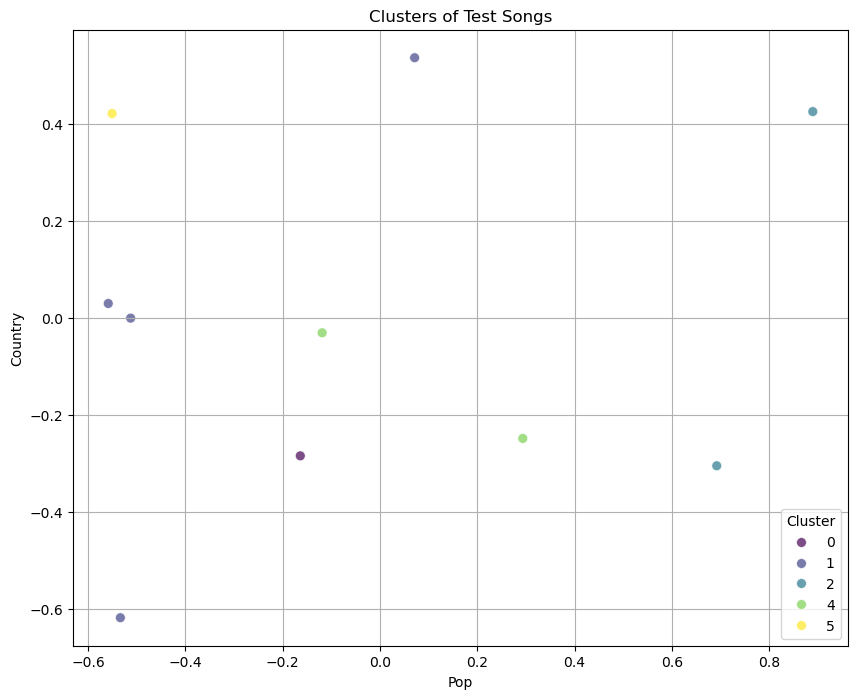

In [89]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_new_transformed_pd['PC_1'], y=df_new_transformed_pd['PC_2'], hue=df_new_transformed_pd['cluster'], palette='viridis', s=50, alpha=0.7)
plt.title(f'Clusters of Test Songs')
plt.xlabel('Pop')
plt.ylabel('Country')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

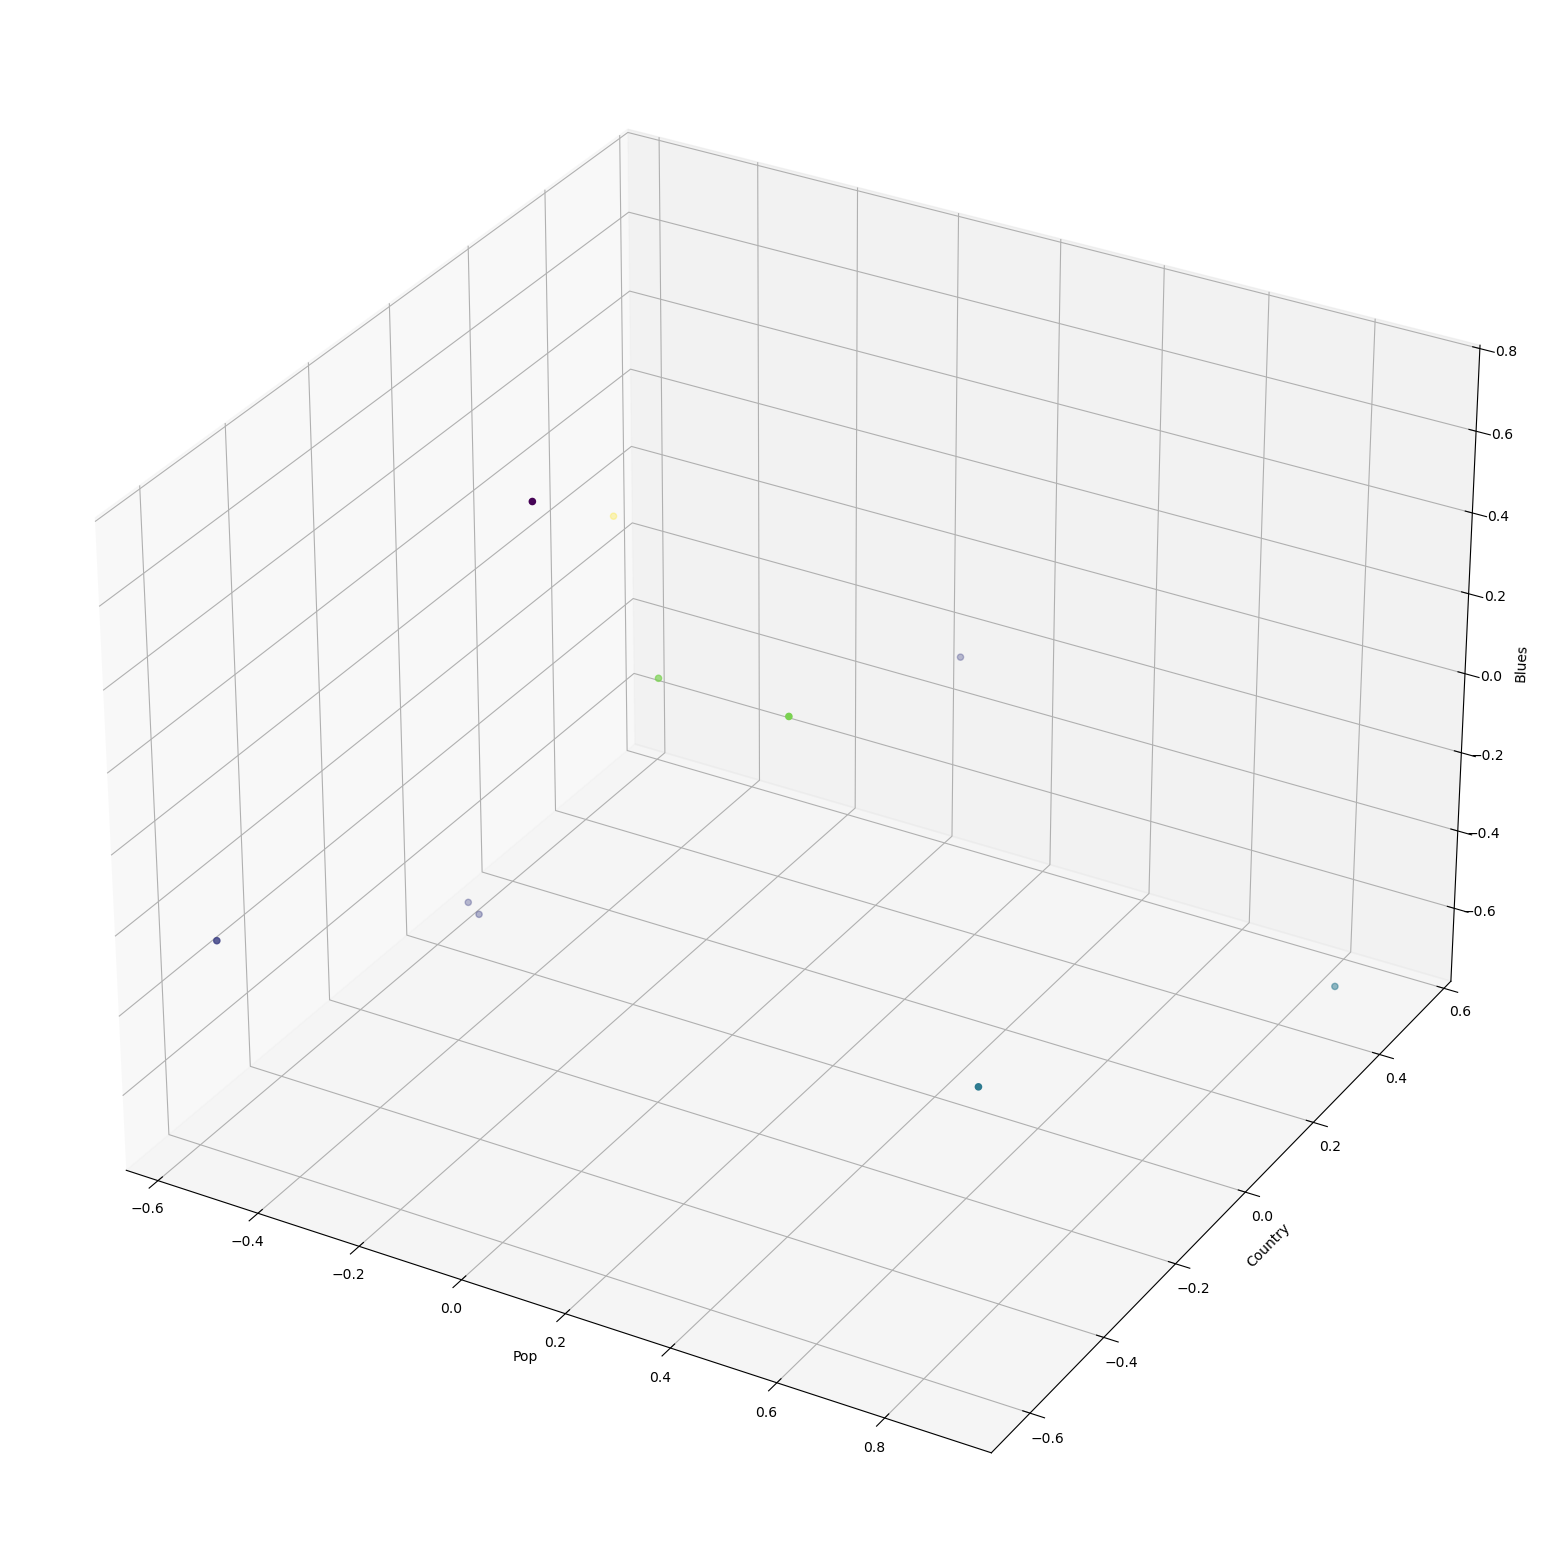

In [90]:
# make a 3D plot of clusters

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df_new_transformed_pd['PC_1'], df_new_transformed_pd['PC_2'], df_new_transformed_pd['PC_3'], c=df_new_transformed_pd['cluster'])

ax.set_xlabel('Pop')
ax.set_ylabel('Country')
ax.set_zlabel('Blues')

plt.gcf().set_size_inches((20, 20))  
plt.show()